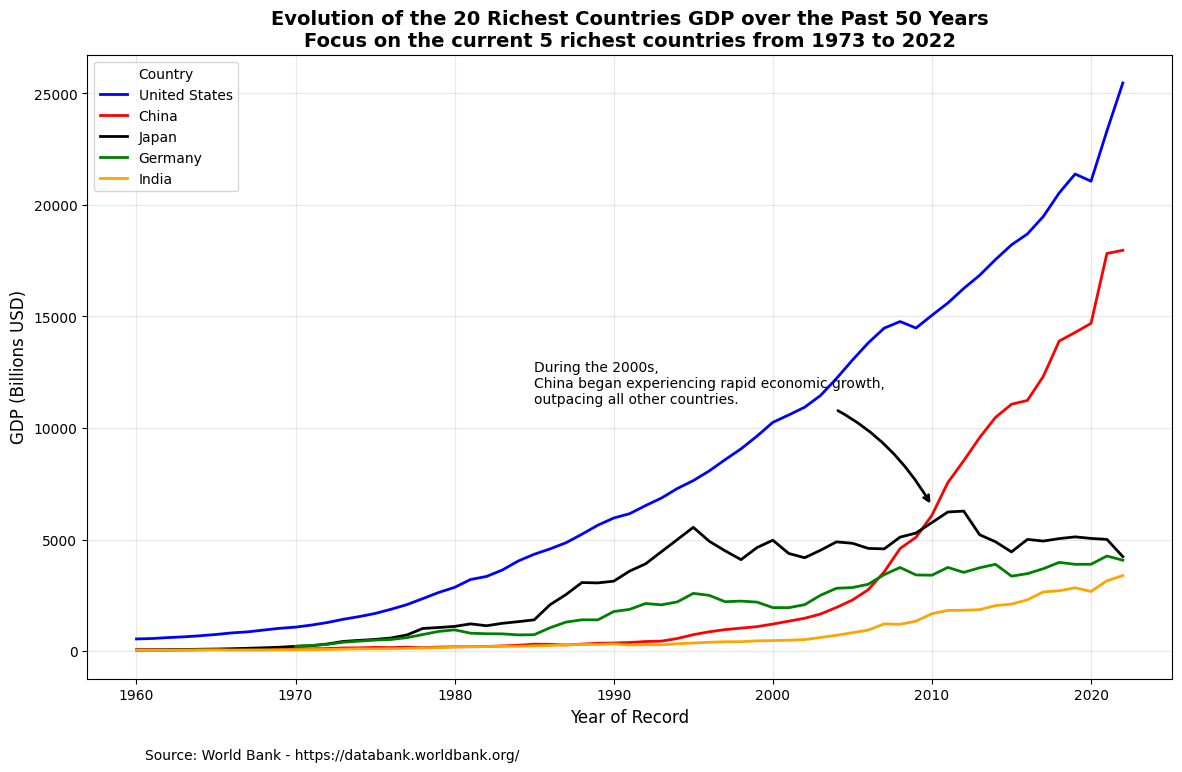

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('GDP_Data_For_Countries.csv', skiprows=3)

# Creating a DataFrame
gdp_data = pd.DataFrame(data)
# Melt the data to long format for plotting
gdp_long = gdp_data.melt(id_vars=["Country Name"], var_name="Year", value_name="GDP")
# Drop unnecessary columns (e.g., 'Unnamed: 67')
gdp_data = gdp_data.loc[:, ~gdp_data.columns.str.contains('^Unnamed')]

# Reshape the data into long format
gdp_long = gdp_data.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="GDP"
)

# Convert 'Year' to integer and 'GDP' to numeric, handling missing values
gdp_long["Year"] = pd.to_numeric(gdp_long["Year"], errors="coerce")
gdp_long["GDP"] = pd.to_numeric(gdp_long["GDP"], errors="coerce")

# Drop rows with missing GDP values
gdp_long = gdp_long.dropna(subset=["GDP"])
# Convert GDP to billions for readability
gdp_long["GDP"] = gdp_long["GDP"] / 1e9


# Selected countries to plot
selected_countries = ["United States", "China", "Japan", "Germany", "India"]

# Filter data for the selected countries
filtered_data = gdp_long[gdp_long["Country Name"].isin(selected_countries)]

# Plot the data
plt.figure(figsize=(14, 8))
colors = {"United States": "blue", "China": "red", "Japan": "black", "Germany": "green", "India": "orange"}

# Iterate only once for each unique country
for country in selected_countries:
    country_data = filtered_data[filtered_data["Country Name"] == country]
    plt.plot(country_data["Year"], country_data["GDP"], label=country, color=colors[country], linewidth=2)

# Add an annotation for China's economic growth with a curved arrow
plt.annotate(
    "During the 2000s,\nChina began experiencing rapid economic growth,\noutpacing all other countries.",
    xy=(2010, 6500),  # Point where the arrow points (Year, GDP value)
    xytext=(1985, 12000),  # Adjusted position of the annotation text (left and above)
    arrowprops=dict(
        arrowstyle="->",    # Arrowhead style
        color="black",      # Arrow color
        linewidth=2,        # Arrow thickness
        connectionstyle="arc3,rad=-0.3"  # Adds a curved arrow
    ),
    fontsize=10,
    ha="left",  # Align text to the left
    va="center" # Vertically center the text
)

# Titles and labels
plt.title(
    "Evolution of the 20 Richest Countries GDP over the Past 50 Years\n"
    "Focus on the current 5 richest countries from 1973 to 2022",
    fontsize=14, weight="bold"
)
plt.xlabel("Year of Record", fontsize=12)
plt.ylabel("GDP (Billions USD)", fontsize=12)
plt.grid(alpha=0.3)

# Source and additional comments
plt.figtext(0.3, -0.0005, "Source: World Bank - https://databank.worldbank.org/", wrap=True, horizontalalignment="center", fontsize=10)# Legend
plt.legend(title="Country", loc="upper left", fontsize=10)
# Adjust bottom margin to leave more space for the source text
plt.subplots_adjust(bottom=0.1)  # Increase bottom margin (0.15 = 15% of figure height)

# Tight layout and show plot
#plt.tight_layout()
plt.savefig('Assignment1.png',bbox_inches='tight')
plt.show()

